In [1]:
# CodeBlock 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import datetime as dt
from sqlalchemy import create_engine
pd.set_option('display.max_columns',500)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
plt.style.use('seaborn-colorblind')
%matplotlib inline

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df_country_vaxDeaths = pd.read_csv('data/country_vaccinationDeath.csv', index_col = None, header = 0 )
df_country_vaxDeaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               32911 non-null  int64  
 1   country                  32911 non-null  object 
 2   iso_code                 32911 non-null  object 
 3   date                     32911 non-null  object 
 4   Year                     32911 non-null  int64  
 5   total_vaccinations       32911 non-null  int64  
 6   people_vaccinated        32911 non-null  int64  
 7   people_fully_vaccinated  32911 non-null  int64  
 8   New_deaths               32911 non-null  int64  
 9   population               32911 non-null  int64  
 10  ratio                    32911 non-null  float64
dtypes: float64(1), int64(7), object(3)
memory usage: 2.8+ MB


In [3]:
df_country_vaxDeaths = df_country_vaxDeaths.drop('Unnamed: 0', axis = 1)
df_country_vaxDeaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  32911 non-null  object 
 1   iso_code                 32911 non-null  object 
 2   date                     32911 non-null  object 
 3   Year                     32911 non-null  int64  
 4   total_vaccinations       32911 non-null  int64  
 5   people_vaccinated        32911 non-null  int64  
 6   people_fully_vaccinated  32911 non-null  int64  
 7   New_deaths               32911 non-null  int64  
 8   population               32911 non-null  int64  
 9   ratio                    32911 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.5+ MB


In [4]:
df_country_vaxDeaths = df_country_vaxDeaths.replace('Russian Federation', 'Russia')
df_country_vaxDeaths = df_country_vaxDeaths.replace('The United Kingdom', 'United Kingdom')

In [5]:
# CodeBlock 2

df_country_vax_detail = pd.read_csv('data/country_vaccinations.csv', index_col = None, header = 0 )
df_country_vax_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   Year                                 86512 non-null  int64  
 4   total_vaccinations                   43607 non-null  float64
 5   people_vaccinated                    41294 non-null  float64
 6   people_fully_vaccinated              38802 non-null  float64
 7   daily_vaccinations_raw               35362 non-null  float64
 8   daily_vaccinations                   86213 non-null  float64
 9   total_vaccinations_per_hundred       43607 non-null  float64
 10  people_vaccinated_per_hundred        41294 non-null  float64
 11  people_fully_vaccinated_per_

In [6]:
# CodeBlock 3

df_country_vax_detail.head()

,country,iso_code,date,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2/22/2021,2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2/23/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2/24/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2/25/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2/26/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [7]:
df_country_vax_detail = df_country_vax_detail.rename(columns = {'date':'date_detail'})
df_country_vax_detail

,country,iso_code,date_detail,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2/22/2021,2021,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2/23/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2/24/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2/25/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2/26/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,3/25/2022,2022,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,3/26/2022,2022,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,3/27/2022,2022,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,3/28/2022,2022,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [8]:
# CodeBlock 4

df_country_vax_Summary = pd.read_csv('data/country_vaccinations_by_manufacturer.csv', index_col = None, header = 0 )
df_country_vax_Summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            35623 non-null  object
 1   date                35623 non-null  object
 2   Year                35623 non-null  int64 
 3   vaccine             35623 non-null  object
 4   total_vaccinations  35623 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.4+ MB


In [9]:
# CodeBlock 5

df_country_vax_Summary = df_country_vax_Summary.rename(columns = {'location':'country'})
df_country_vax_Summary

,country,date,Year,vaccine,total_vaccinations
0,Argentina,12/29/2020,2020,Moderna,2
1,Argentina,12/29/2020,2020,Oxford/AstraZeneca,3
2,Argentina,12/29/2020,2020,Sinopharm/Beijing,1
3,Argentina,12/29/2020,2020,Sputnik V,20481
4,Argentina,12/30/2020,2020,Moderna,2
...,...,...,...,...,...
35618,European Union,3/29/2022,2022,Oxford/AstraZeneca,67403106
35619,European Union,3/29/2022,2022,Pfizer/BioNTech,600519998
35620,European Union,3/29/2022,2022,Sinopharm/Beijing,2301516
35621,European Union,3/29/2022,2022,Sinovac,1809


In [10]:
df_country_vax_Summary = df_country_vax_Summary.drop(['total_vaccinations'], axis = 1)
df_country_vax_Summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  35623 non-null  object
 1   date     35623 non-null  object
 2   Year     35623 non-null  int64 
 3   vaccine  35623 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [11]:
df_country_vax_Summary = df_country_vax_Summary.rename(columns = {'date':'date_summary'})
df_country_vax_Summary

,country,date_summary,Year,vaccine
0,Argentina,12/29/2020,2020,Moderna
1,Argentina,12/29/2020,2020,Oxford/AstraZeneca
2,Argentina,12/29/2020,2020,Sinopharm/Beijing
3,Argentina,12/29/2020,2020,Sputnik V
4,Argentina,12/30/2020,2020,Moderna
...,...,...,...,...
35618,European Union,3/29/2022,2022,Oxford/AstraZeneca
35619,European Union,3/29/2022,2022,Pfizer/BioNTech
35620,European Union,3/29/2022,2022,Sinopharm/Beijing
35621,European Union,3/29/2022,2022,Sinovac


In [12]:
#df_country_vax_Summary = df_country_vax_Summary.rename(columns = {'total_vaccinations':'total_vaccinations_Summary'})
#df_country_vax_Summary

In [13]:
# CodeBlock 6

df_CovidCases_Europe = pd.read_csv('data/CovidCasesEurope.csv', index_col = None, header = 0 )
df_CovidCases_Europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1048575 non-null  int64  
 1   date of report    1048575 non-null  object 
 2   Year              1048575 non-null  int64  
 3   cases             1048575 non-null  int64  
 4   country           1048575 non-null  object 
 5   qry               1048575 non-null  object 
 6   lat               1048575 non-null  float64
 7   long              1048575 non-null  float64
 8   dayofyear         1048575 non-null  int64  
 9   year              1048575 non-null  int64  
 10  lengthofday       1048575 non-null  float64
 11  delta             1048575 non-null  float64
 12  delta2            1048575 non-null  float64
 13  normilized_cases  1048575 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 112.0+ MB


In [14]:
# CodeBlock 7

df_CovidCases_Europe.head()

,Unnamed: 0,date of report,Year,cases,country,qry,lat,long,dayofyear,year,lengthofday,delta,delta2,normilized_cases
0,4588298,3/12/2020,2020,0,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,72,2020,12.603770,0.068237,0.000260,0.0
1,4588299,3/14/2020,2020,1,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,74,2020,12.740993,0.068734,0.000245,0.0
2,4588300,3/16/2020,2020,2,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,76,2020,12.879166,0.069201,0.000230,0.0
3,4588301,3/17/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,77,2020,12.948590,0.069424,0.000223,0.0
4,4588302,3/18/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,78,2020,13.018229,0.069639,0.000215,0.0


In [15]:
# CodeBlock 8

df_CovidCases_Europe = df_CovidCases_Europe.drop('Unnamed: 0', axis = 1)
df_CovidCases_Europe

,date of report,Year,cases,country,qry,lat,long,dayofyear,year,lengthofday,delta,delta2,normilized_cases
0,3/12/2020,2020,0,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,72,2020,12.603770,0.068237,0.000260,0.0
1,3/14/2020,2020,1,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,74,2020,12.740993,0.068734,0.000245,0.0
2,3/16/2020,2020,2,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,76,2020,12.879166,0.069201,0.000230,0.0
3,3/17/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,77,2020,12.948590,0.069424,0.000223,0.0
4,3/18/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,78,2020,13.018229,0.069639,0.000215,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1/27/2021,2021,74,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,27,2021,10.275160,0.038423,0.000817,0.0
1048571,1/28/2021,2021,38,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,28,2021,10.314382,0.039222,0.000799,0.0
1048572,1/29/2021,2021,74,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,29,2021,10.354386,0.040004,0.000782,0.0
1048573,1/30/2021,2021,62,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,30,2021,10.395154,0.040768,0.000764,0.0


In [16]:

df_vaccine_all = pd.merge(df_country_vax_Summary, df_country_vaxDeaths, how='outer', on='country')
df_vaccine_all.head()

,country,date_summary,Year_x,vaccine,iso_code,date,Year_y,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Argentina,12/29/2020,2020.0,Moderna,ARG,12/29/2020,2020.0,20487.0,20482.0,5.0,191.0,45847428.0,0.044674
1,Argentina,12/29/2020,2020.0,Moderna,ARG,12/30/2020,2020.0,40589.0,40579.0,10.0,212.0,45847428.0,0.088509
2,Argentina,12/29/2020,2020.0,Moderna,ARG,12/31/2020,2020.0,43394.0,43384.0,10.0,113.0,45847428.0,0.094627
3,Argentina,12/29/2020,2020.0,Moderna,ARG,1/1/2021,2021.0,43521.0,43511.0,10.0,66.0,45847428.0,0.094904
4,Argentina,12/29/2020,2020.0,Moderna,ARG,1/2/2021,2021.0,46833.0,46821.0,12.0,148.0,45847428.0,0.102124


In [17]:
df_vaccine_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826027 entries, 0 to 9826026
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   country                  object 
 1   date_summary             object 
 2   Year_x                   float64
 3   vaccine                  object 
 4   iso_code                 object 
 5   date                     object 
 6   Year_y                   float64
 7   total_vaccinations       float64
 8   people_vaccinated        float64
 9   people_fully_vaccinated  float64
 10  New_deaths               float64
 11  population               float64
 12  ratio                    float64
dtypes: float64(8), object(5)
memory usage: 1.0+ GB


In [18]:

df_vaccine_all = df_vaccine_all.fillna(0)
df_vaccine_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826027 entries, 0 to 9826026
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   country                  object 
 1   date_summary             object 
 2   Year_x                   float64
 3   vaccine                  object 
 4   iso_code                 object 
 5   date                     object 
 6   Year_y                   float64
 7   total_vaccinations       float64
 8   people_vaccinated        float64
 9   people_fully_vaccinated  float64
 10  New_deaths               float64
 11  population               float64
 12  ratio                    float64
dtypes: float64(8), object(5)
memory usage: 1.0+ GB


In [19]:
df_vaccine_all['total_vaccinations'].describe()

count    9.826027e+06
mean     3.220512e+07
std      4.342694e+07
min      0.000000e+00
25%      2.218793e+06
50%      1.074017e+07
75%      4.697966e+07
max      3.243599e+09
Name: total_vaccinations, dtype: float64

In [20]:
df_vaccine_all['ratio'].describe()

count    9.826027e+06
mean     4.642293e+01
std      3.047117e+01
min      0.000000e+00
25%      1.474807e+01
50%      5.367932e+01
75%      7.448407e+01
max      1.247374e+02
Name: ratio, dtype: float64

In [21]:
df_CovidCases_Europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   date of report    1048575 non-null  object 
 1   Year              1048575 non-null  int64  
 2   cases             1048575 non-null  int64  
 3   country           1048575 non-null  object 
 4   qry               1048575 non-null  object 
 5   lat               1048575 non-null  float64
 6   long              1048575 non-null  float64
 7   dayofyear         1048575 non-null  int64  
 8   year              1048575 non-null  int64  
 9   lengthofday       1048575 non-null  float64
 10  delta             1048575 non-null  float64
 11  delta2            1048575 non-null  float64
 12  normilized_cases  1048575 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 104.0+ MB


In [22]:
df_CovidCases_Europe['lengthofday'].describe()

count    1.048575e+06
mean     1.352943e+01
std      3.021219e+00
min      7.742285e+00
25%      1.074121e+01
50%      1.342631e+01
75%      1.614536e+01
max      2.006000e+01
Name: lengthofday, dtype: float64

In [23]:
df_CovidCases_Europe['cases'].describe()

count    1.048575e+06
mean     8.923526e+01
std      3.724366e+02
min      0.000000e+00
25%      2.000000e+00
50%      1.200000e+01
75%      6.100000e+01
max      3.490400e+04
Name: cases, dtype: float64

In [24]:
country_list = ['Germany','Italy', 'France', 'United Kingdom', 'Spain', 'Russia', 'China', 'Japan', 'India']
df_vaccine_all = df_vaccine_all[df_vaccine_all['country'].isin(country_list)]
df_vaccine_all

,country,date_summary,Year_x,vaccine,iso_code,date,Year_y,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
2930571,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/2/2021,2021.0,3856.0,3855.0,1.0,133.0,65520147.0,0.005884
2930572,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/3/2021,2021.0,4250.0,4249.0,1.0,156.0,65520147.0,0.006485
2930573,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/4/2021,2021.0,6324.0,6323.0,1.0,116.0,65520147.0,0.009650
2930574,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/5/2021,2021.0,13134.0,13131.0,3.0,376.0,65520147.0,0.020041
2930575,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/6/2021,2021.0,25409.0,25402.0,7.0,867.0,65520147.0,0.038770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824836,United Kingdom,0,0.0,0,GBR,3/24/2022,2022.0,140830644.0,52759213.0,49352885.0,227.0,68401087.0,77.132127
9824837,United Kingdom,0,0.0,0,GBR,3/25/2022,2022.0,140867776.0,52764899.0,49366211.0,207.0,68401087.0,77.140439
9824838,United Kingdom,0,0.0,0,GBR,3/26/2022,2022.0,140914631.0,52775615.0,49385014.0,215.0,68401087.0,77.156106
9824839,United Kingdom,0,0.0,0,GBR,3/27/2022,2022.0,140937817.0,52783242.0,49393056.0,227.0,68401087.0,77.167256


In [25]:
country_list2 = ['Germany','Italy', 'France', 'United Kingdom', 'Spain']
df_CovidCases_Europe = df_CovidCases_Europe[df_CovidCases_Europe['country'].isin(country_list2)]
df_CovidCases_Europe

,date of report,Year,cases,country,qry,lat,long,dayofyear,year,lengthofday,delta,delta2,normilized_cases
0,3/12/2020,2020,0,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,72,2020,12.603770,0.068237,0.000260,0.0
1,3/14/2020,2020,1,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,74,2020,12.740993,0.068734,0.000245,0.0
2,3/16/2020,2020,2,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,76,2020,12.879166,0.069201,0.000230,0.0
3,3/17/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,77,2020,12.948590,0.069424,0.000223,0.0
4,3/18/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,78,2020,13.018229,0.069639,0.000215,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1/27/2021,2021,74,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,27,2021,10.275160,0.038423,0.000817,0.0
1048571,1/28/2021,2021,38,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,28,2021,10.314382,0.039222,0.000799,0.0
1048572,1/29/2021,2021,74,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,29,2021,10.354386,0.040004,0.000782,0.0
1048573,1/30/2021,2021,62,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,30,2021,10.395154,0.040768,0.000764,0.0


In [26]:
df_CovidCases_Germany = df_CovidCases_Europe[df_CovidCases_Europe['country']=='Germany']
df_CovidCases_Germany

,date of report,Year,cases,country,qry,lat,long,dayofyear,year,lengthofday,delta,delta2,normilized_cases
0,3/12/2020,2020,0,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,72,2020,12.603770,0.068237,0.000260,0.0
1,3/14/2020,2020,1,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,74,2020,12.740993,0.068734,0.000245,0.0
2,3/16/2020,2020,2,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,76,2020,12.879166,0.069201,0.000230,0.0
3,3/17/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,77,2020,12.948590,0.069424,0.000223,0.0
4,3/18/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,78,2020,13.018229,0.069639,0.000215,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1/27/2021,2021,74,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,27,2021,10.275160,0.038423,0.000817,0.0
1048571,1/28/2021,2021,38,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,28,2021,10.314382,0.039222,0.000799,0.0
1048572,1/29/2021,2021,74,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,29,2021,10.354386,0.040004,0.000782,0.0
1048573,1/30/2021,2021,62,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,30,2021,10.395154,0.040768,0.000764,0.0


In [27]:
df_vaccine_Germany = df_country_vax_detail[df_country_vax_detail['country']=='Germany']
df_vaccine_Germany

,country,iso_code,date_detail,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
28974,Germany,DEU,12/27/2020,2020,24376.0,24357.0,19.0,NaN,NaN,0.03,0.03,0.00,NaN,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
28975,Germany,DEU,12/28/2020,2020,42477.0,42394.0,83.0,18101.0,18101.0,0.05,0.05,0.00,216.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
28976,Germany,DEU,12/29/2020,2020,93182.0,92446.0,735.0,50705.0,34403.0,0.11,0.11,0.00,410.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
28977,Germany,DEU,12/30/2020,2020,157385.0,156615.0,769.0,64203.0,44336.0,0.19,0.19,0.00,528.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
28978,Germany,DEU,12/31/2020,2020,207402.0,206545.0,856.0,50017.0,45756.0,0.25,0.25,0.00,545.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29427,Germany,DEU,3/25/2022,2022,171816715.0,63652350.0,63114548.0,60181.0,49297.0,204.79,75.87,75.23,588.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
29428,Germany,DEU,3/26/2022,2022,171839777.0,63655041.0,63121309.0,23062.0,48508.0,204.81,75.87,75.23,578.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
29429,Germany,DEU,3/27/2022,2022,171849411.0,63655931.0,63124033.0,9634.0,48301.0,204.83,75.87,75.24,576.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
29430,Germany,DEU,3/28/2022,2022,171885915.0,63659100.0,63132281.0,36504.0,47518.0,204.87,75.87,75.25,566.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/


In [28]:
df_vaccine_Italy = df_vaccine_all[df_vaccine_all['country']=='Italy']
df_vaccine_Italy

,country,date_summary,Year_x,vaccine,iso_code,date,Year_y,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
4930316,Italy,12/27/2020,2020.0,Moderna,ITA,1/4/2021,2021.0,196638.0,196638.0,9.0,347.0,60320493.0,0.325989
4930317,Italy,12/27/2020,2020.0,Moderna,ITA,1/5/2021,2021.0,276896.0,276896.0,11.0,348.0,60320493.0,0.459041
4930318,Italy,12/27/2020,2020.0,Moderna,ITA,1/6/2021,2021.0,342075.0,342075.0,13.0,649.0,60320493.0,0.567096
4930319,Italy,12/27/2020,2020.0,Moderna,ITA,1/7/2021,2021.0,434720.0,434720.0,15.0,548.0,60320493.0,0.720684
4930320,Italy,12/27/2020,2020.0,Moderna,ITA,1/8/2021,2021.0,531704.0,531704.0,15.0,414.0,60320493.0,0.881465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667861,Italy,3/29/2022,2022.0,Pfizer/BioNTech,ITA,3/25/2022,2022.0,135720031.0,50716073.0,47796125.0,182.0,60320493.0,84.077683
5667862,Italy,3/29/2022,2022.0,Pfizer/BioNTech,ITA,3/26/2022,2022.0,135772999.0,50718827.0,47803667.0,146.0,60320493.0,84.082249
5667863,Italy,3/29/2022,2022.0,Pfizer/BioNTech,ITA,3/27/2022,2022.0,135785891.0,50719613.0,47805978.0,118.0,60320493.0,84.083552
5667864,Italy,3/29/2022,2022.0,Pfizer/BioNTech,ITA,3/28/2022,2022.0,135830078.0,50721490.0,47811809.0,82.0,60320493.0,84.086664


In [29]:
df_vaccine_France = df_vaccine_all[df_vaccine_all['country']=='France']
df_vaccine_France

,country,date_summary,Year_x,vaccine,iso_code,date,Year_y,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
2930571,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/2/2021,2021.0,3856.0,3855.0,1.0,133.0,65520147.0,0.005884
2930572,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/3/2021,2021.0,4250.0,4249.0,1.0,156.0,65520147.0,0.006485
2930573,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/4/2021,2021.0,6324.0,6323.0,1.0,116.0,65520147.0,0.009650
2930574,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/5/2021,2021.0,13134.0,13131.0,3.0,376.0,65520147.0,0.020041
2930575,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/6/2021,2021.0,25409.0,25402.0,7.0,867.0,65520147.0,0.038770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675618,France,3/28/2022,2022.0,Pfizer/BioNTech,FRA,3/24/2022,2022.0,141554273.0,53989329.0,52428797.0,100.0,65520147.0,82.401111
3675619,France,3/28/2022,2022.0,Pfizer/BioNTech,FRA,3/25/2022,2022.0,141604288.0,53990843.0,52432867.0,124.0,65520147.0,82.403422
3675620,France,3/28/2022,2022.0,Pfizer/BioNTech,FRA,3/26/2022,2022.0,141632440.0,53991965.0,52435804.0,118.0,65520147.0,82.405134
3675621,France,3/28/2022,2022.0,Pfizer/BioNTech,FRA,3/27/2022,2022.0,141636394.0,53992194.0,52436336.0,65.0,65520147.0,82.405484


In [30]:
df_vaccine_UK = df_vaccine_all[df_vaccine_all['country']=='United Kingdom']
df_vaccine_UK

,country,date_summary,Year_x,vaccine,iso_code,date,Year_y,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
9824399,United Kingdom,0,0.0,0,GBR,1/10/2021,2021.0,2677971.0,2286572.0,391399.0,989.0,68401087.0,3.342888
9824400,United Kingdom,0,0.0,0,GBR,1/11/2021,2021.0,2843815.0,2431648.0,412167.0,1023.0,68401087.0,3.554984
9824401,United Kingdom,0,0.0,0,GBR,1/12/2021,2021.0,3067541.0,2639309.0,428232.0,1099.0,68401087.0,3.858578
9824402,United Kingdom,0,0.0,0,GBR,1/13/2021,2021.0,3356229.0,2918252.0,437977.0,1132.0,68401087.0,4.266382
9824403,United Kingdom,0,0.0,0,GBR,1/14/2021,2021.0,3678180.0,3234946.0,443234.0,1213.0,68401087.0,4.729378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824836,United Kingdom,0,0.0,0,GBR,3/24/2022,2022.0,140830644.0,52759213.0,49352885.0,227.0,68401087.0,77.132127
9824837,United Kingdom,0,0.0,0,GBR,3/25/2022,2022.0,140867776.0,52764899.0,49366211.0,207.0,68401087.0,77.140439
9824838,United Kingdom,0,0.0,0,GBR,3/26/2022,2022.0,140914631.0,52775615.0,49385014.0,215.0,68401087.0,77.156106
9824839,United Kingdom,0,0.0,0,GBR,3/27/2022,2022.0,140937817.0,52783242.0,49393056.0,227.0,68401087.0,77.167256


In [31]:
df_vaccine_Spain = df_vaccine_all[df_vaccine_all['country']=='Spain']
df_vaccine_Spain

,country,date_summary,Year_x,vaccine,iso_code,date,Year_y,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
8120775,Spain,1/8/2021,2021.0,Johnson&Johnson,ESP,1/18/2021,2021.0,897942.0,895627.0,2315.0,364.0,46736811.0,1.916320
8120776,Spain,1/8/2021,2021.0,Johnson&Johnson,ESP,1/19/2021,2021.0,966097.0,956756.0,9341.0,369.0,46736811.0,2.047114
8120777,Spain,1/8/2021,2021.0,Johnson&Johnson,ESP,1/20/2021,2021.0,1025937.0,1010295.0,15642.0,413.0,46736811.0,2.161669
8120778,Spain,1/8/2021,2021.0,Johnson&Johnson,ESP,1/21/2021,2021.0,1103301.0,1054245.0,49056.0,490.0,46736811.0,2.255706
8120779,Spain,1/8/2021,2021.0,Johnson&Johnson,ESP,1/22/2021,2021.0,1165825.0,1097369.0,68456.0,462.0,46736811.0,2.347976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8191834,Spain,3/18/2022,2022.0,Pfizer/BioNTech,ESP,3/2/2022,2022.0,92726740.0,41079854.0,39083122.0,97.0,46736811.0,87.896143
8191835,Spain,3/18/2022,2022.0,Pfizer/BioNTech,ESP,3/3/2022,2022.0,92774397.0,41083791.0,39103590.0,79.0,46736811.0,87.904566
8191836,Spain,3/18/2022,2022.0,Pfizer/BioNTech,ESP,3/10/2022,2022.0,93346088.0,41089269.0,39845453.0,71.0,46736811.0,87.916287
8191837,Spain,3/18/2022,2022.0,Pfizer/BioNTech,ESP,3/16/2022,2022.0,93571317.0,41112436.0,39976615.0,53.0,46736811.0,87.965856


In [32]:
df_vaccine_Russia = df_vaccine_all[df_vaccine_all['country']=='Russia']
df_vaccine_Russia

,country,date_summary,Year_x,vaccine,iso_code,date,Year_y,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
9820399,Russia,0,0.0,0,RUS,3/2/2021,2021.0,5249831.0,4158334.0,1091497.0,441.0,145899956.0,2.850127
9820400,Russia,0,0.0,0,RUS,3/3/2021,2021.0,5489342.0,4287423.0,1201919.0,452.0,145899956.0,2.938605
9820401,Russia,0,0.0,0,RUS,3/4/2021,2021.0,6010744.0,4701175.0,1309569.0,475.0,145899956.0,3.222191
9820402,Russia,0,0.0,0,RUS,3/5/2021,2021.0,6301854.0,4908178.0,1393676.0,462.0,145899956.0,3.364071
9820403,Russia,0,0.0,0,RUS,3/6/2021,2021.0,6583873.0,5082127.0,1501746.0,441.0,145899956.0,3.483296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9820726,Russia,0,0.0,0,RUS,3/25/2022,2022.0,163065113.0,79621685.0,72712682.0,398.0,145899956.0,54.572796
9820727,Russia,0,0.0,0,RUS,3/26/2022,2022.0,163472534.0,79905693.0,72793010.0,395.0,145899956.0,54.767455
9820728,Russia,0,0.0,0,RUS,3/27/2022,2022.0,163498591.0,79914874.0,72800841.0,338.0,145899956.0,54.773748
9820729,Russia,0,0.0,0,RUS,3/28/2022,2022.0,163513489.0,79920509.0,72808825.0,335.0,145899956.0,54.777610


In [33]:
df_vaccine_China = df_vaccine_all[df_vaccine_all['country']=='China']
df_vaccine_China

,country,date_summary,Year_x,vaccine,iso_code,date,Year_y,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
9809684,China,0,0.0,0,CHN,8/26/2021,2021.0,2.003914e+09,1.072500e+09,8.894390e+08,1.0,1.447065e+09,74.115520
9809685,China,0,0.0,0,CHN,9/6/2021,2021.0,2.113083e+09,1.095000e+09,9.697200e+08,0.0,1.447065e+09,75.670392
9809686,China,0,0.0,0,CHN,9/18/2021,2021.0,2.174043e+09,1.100842e+09,1.022207e+09,0.0,1.447065e+09,76.074105
9809687,China,0,0.0,0,CHN,11/19/2021,2021.0,2.422908e+09,1.225000e+09,1.076308e+09,0.0,1.447065e+09,84.654091
9809688,China,0,0.0,0,CHN,12/28/2021,2021.0,2.795716e+09,1.259967e+09,1.207413e+09,0.0,1.447065e+09,87.070499
9809689,China,0,0.0,0,CHN,1/7/2022,2022.0,2.887772e+09,1.262264e+09,1.215878e+09,0.0,1.447065e+09,87.229234
9809690,China,0,0.0,0,CHN,1/14/2022,2022.0,2.928981e+09,1.263691e+09,1.220584e+09,1.0,1.447065e+09,87.327847
9809691,China,0,0.0,0,CHN,1/21/2022,2022.0,2.960675e+09,1.265034e+09,1.224450e+09,0.0,1.447065e+09,87.420656
9809692,China,0,0.0,0,CHN,1/28/2022,2022.0,2.994162e+09,1.266070e+09,1.227387e+09,0.0,1.447065e+09,87.492249
9809693,China,0,0.0,0,CHN,2/7/2022,2022.0,3.010669e+09,1.266426e+09,1.228340e+09,0.0,1.447065e+09,87.516850


In [34]:
df_vaccine_Japan = df_vaccine_all[df_vaccine_all['country']=='Japan']
df_vaccine_Japan

,country,date_summary,Year_x,vaccine,iso_code,date,Year_y,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
5667866,Japan,2/17/2021,2021.0,Pfizer/BioNTech,JPN,3/10/2021,2021.0,148950.0,148915.0,35.0,54.0,125802521.0,0.118372
5667867,Japan,2/17/2021,2021.0,Pfizer/BioNTech,JPN,3/11/2021,2021.0,181184.0,180741.0,443.0,49.0,125802521.0,0.143670
5667868,Japan,2/17/2021,2021.0,Pfizer/BioNTech,JPN,3/12/2021,2021.0,230542.0,227194.0,3348.0,49.0,125802521.0,0.180596
5667869,Japan,2/17/2021,2021.0,Pfizer/BioNTech,JPN,3/15/2021,2021.0,290275.0,282398.0,7877.0,30.0,125802521.0,0.224477
5667870,Japan,2/17/2021,2021.0,Pfizer/BioNTech,JPN,3/16/2021,2021.0,359191.0,349844.0,9347.0,32.0,125802521.0,0.278090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729511,Japan,8/4/2021,2021.0,Pfizer/BioNTech,JPN,3/22/2022,2022.0,248489469.0,102198880.0,100523795.0,131.0,125802521.0,81.237545
5729512,Japan,8/4/2021,2021.0,Pfizer/BioNTech,JPN,3/23/2022,2022.0,249408158.0,102231099.0,100536048.0,70.0,125802521.0,81.263156
5729513,Japan,8/4/2021,2021.0,Pfizer/BioNTech,JPN,3/24/2022,2022.0,250187988.0,102258371.0,100547291.0,110.0,125802521.0,81.284835
5729514,Japan,8/4/2021,2021.0,Pfizer/BioNTech,JPN,3/27/2022,2022.0,252334857.0,102370587.0,100593847.0,98.0,125802521.0,81.374035


In [35]:
df_vaccine_India = df_vaccine_all[df_vaccine_all['country']=='India']
df_vaccine_India

,country,date_summary,Year_x,vaccine,iso_code,date,Year_y,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
9813297,India,0,0.0,0,IND,2/13/2021,2021.0,8.052454e+06,8044786.0,7668.0,103.0,1.401311e+09,0.574090
9813298,India,0,0.0,0,IND,2/15/2021,2021.0,8.516771e+06,8418653.0,98118.0,90.0,1.401311e+09,0.600770
9813299,India,0,0.0,0,IND,2/16/2021,2021.0,8.857341e+06,8641002.0,216339.0,81.0,1.401311e+09,0.616637
9813300,India,0,0.0,0,IND,2/17/2021,2021.0,9.186757e+06,8844641.0,342116.0,100.0,1.401311e+09,0.631169
9813301,India,0,0.0,0,IND,2/18/2021,2021.0,9.846523e+06,9381591.0,464932.0,101.0,1.401311e+09,0.669487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813691,India,0,0.0,0,IND,3/25/2022,2022.0,1.826266e+09,980435665.0,824764568.0,83.0,1.401311e+09,69.965623
9813692,India,0,0.0,0,IND,3/26/2022,2022.0,1.830285e+09,982687842.0,826360688.0,4100.0,1.401311e+09,70.126342
9813693,India,0,0.0,0,IND,3/27/2022,2022.0,1.831348e+09,983190780.0,826884564.0,149.0,1.401311e+09,70.162233
9813694,India,0,0.0,0,IND,3/28/2022,2022.0,1.833040e+09,984051283.0,827610878.0,31.0,1.401311e+09,70.223640


In [36]:
df_vaccine_Brazil = df_vaccine_all[df_vaccine_all['country']=='Brazil']
df_vaccine_Brazil

,country,date_summary,Year_x,vaccine,iso_code,date,Year_y,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio


In [37]:
df_vaccine_all = df_vaccine_all.replace('United Kingdom', 'U.K.')

Text(0, 0.5, 'Covid Cases')

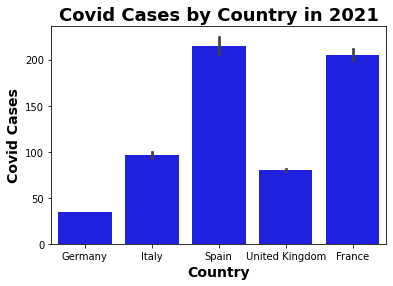

In [38]:
sns.barplot(x= 'country', y= 'cases', data = df_CovidCases_Europe[df_CovidCases_Europe['Year']==2021], color = 'b')
plt.title('Covid Cases by Country in 2021', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Country', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Covid Cases', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

Text(0, 0.5, 'Covid Deaths')

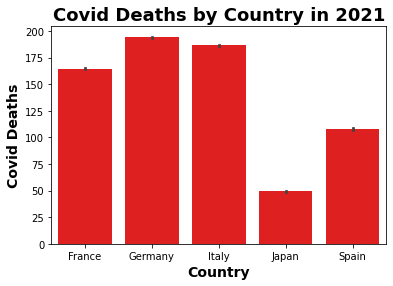

In [40]:
sns.barplot(x= 'country', y= 'New_deaths', data = df_vaccine_all[df_vaccine_all['Year_x']==2021], color = 'r')
plt.title('Covid Deaths by Country in 2021', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Country', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Covid Deaths', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

In [ ]:
sns.barplot(x= 'country', y= 'total_vaccinations', data = df_vaccine_all[df_vaccine_all['Year_x']==2021], color = 'g')
plt.title('Total Vaccinations by Country in 2021', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Country', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Total Vaccinations', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

<AxesSubplot:title={'center':'Total Vaccination Ratio based on Countries for 2021'}, xlabel='country', ylabel='ratio'>

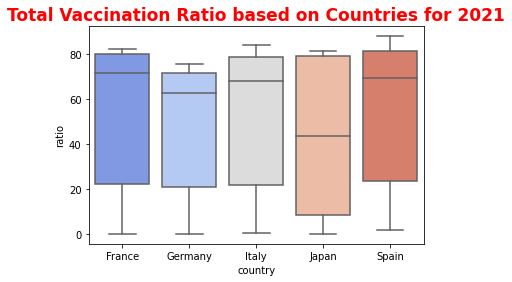

In [41]:
plt.title('Total Vaccination Ratio based on Countries for 2021', fontweight='bold', color = 'red', fontsize='17', horizontalalignment='center')
sns.boxplot(y = "ratio", x = "country", data = df_vaccine_all[df_vaccine_all['Year_x']==2021], palette = 'coolwarm')

In [42]:
df_country_vax_Summary = pd.read_csv('data/country_vaccinations_by_manufacturer.csv', index_col = None, header = 0 )
df_country_vax_Summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            35623 non-null  object
 1   date                35623 non-null  object
 2   Year                35623 non-null  int64 
 3   vaccine             35623 non-null  object
 4   total_vaccinations  35623 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.4+ MB


In [43]:
df_country_vax_Summary = df_country_vax_Summary.rename(columns = {'location':'country'})
df_country_vax_Summary

,country,date,Year,vaccine,total_vaccinations
0,Argentina,12/29/2020,2020,Moderna,2
1,Argentina,12/29/2020,2020,Oxford/AstraZeneca,3
2,Argentina,12/29/2020,2020,Sinopharm/Beijing,1
3,Argentina,12/29/2020,2020,Sputnik V,20481
4,Argentina,12/30/2020,2020,Moderna,2
...,...,...,...,...,...
35618,European Union,3/29/2022,2022,Oxford/AstraZeneca,67403106
35619,European Union,3/29/2022,2022,Pfizer/BioNTech,600519998
35620,European Union,3/29/2022,2022,Sinopharm/Beijing,2301516
35621,European Union,3/29/2022,2022,Sinovac,1809


In [44]:
df_vaccine_Japan = df_country_vax_Summary[df_country_vax_Summary['country']=='Japan']
df_vaccine_Japan

,country,date,Year,vaccine,total_vaccinations
16419,Japan,2/17/2021,2021,Pfizer/BioNTech,125
16420,Japan,2/18/2021,2021,Pfizer/BioNTech,611
16421,Japan,2/19/2021,2021,Pfizer/BioNTech,5039
16422,Japan,2/22/2021,2021,Pfizer/BioNTech,11934
16423,Japan,2/24/2021,2021,Pfizer/BioNTech,17888
...,...,...,...,...,...
16639,Japan,8/2/2021,2021,Pfizer/BioNTech,85373829
16640,Japan,8/3/2021,2021,Moderna,5605114
16641,Japan,8/3/2021,2021,Pfizer/BioNTech,86092639
16642,Japan,8/4/2021,2021,Moderna,5687427


In [45]:
df_vaccine_Germany = df_country_vax_Summary[df_country_vax_Summary['country']=='Germany']
df_vaccine_Germany

,country,date,Year,vaccine,total_vaccinations
10819,Germany,12/27/2020,2020,Johnson&Johnson,0
10820,Germany,12/27/2020,2020,Moderna,8
10821,Germany,12/27/2020,2020,Novavax,0
10822,Germany,12/27/2020,2020,Oxford/AstraZeneca,1
10823,Germany,12/27/2020,2020,Pfizer/BioNTech,24367
...,...,...,...,...,...
13104,Germany,3/29/2022,2022,Johnson&Johnson,3628087
13105,Germany,3/29/2022,2022,Moderna,29435818
13106,Germany,3/29/2022,2022,Novavax,76908
13107,Germany,3/29/2022,2022,Oxford/AstraZeneca,12757971


In [46]:
df_vaccine_Japan.groupby('vaccine')[['total_vaccinations']].sum().reset_index()

,vaccine,total_vaccinations
0,Moderna,141520769
1,Pfizer/BioNTech,3768902151


No handles with labels found to put in legend.


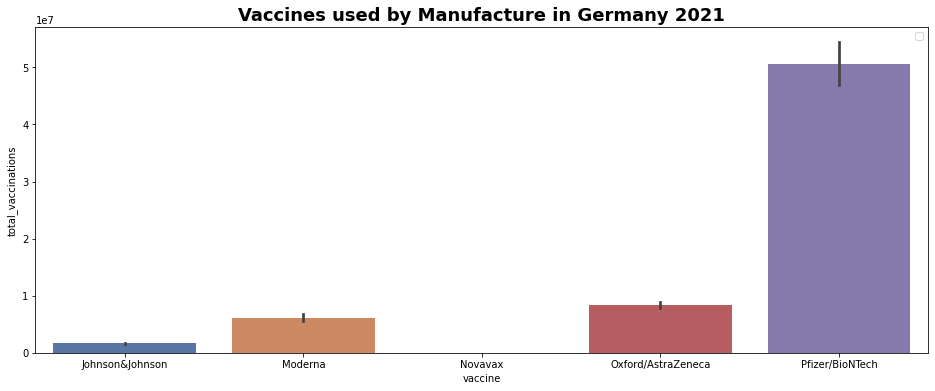

In [47]:
plt.figure(figsize=(16,6))
plt.title('Vaccines used by Manufacture in Germany 2021', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
ax = sns.barplot(y = "total_vaccinations", x = "vaccine", data = df_vaccine_Germany[df_vaccine_Germany['Year']==2021], palette = 'deep', dodge = False), 
plt.legend(loc="upper right")

No handles with labels found to put in legend.


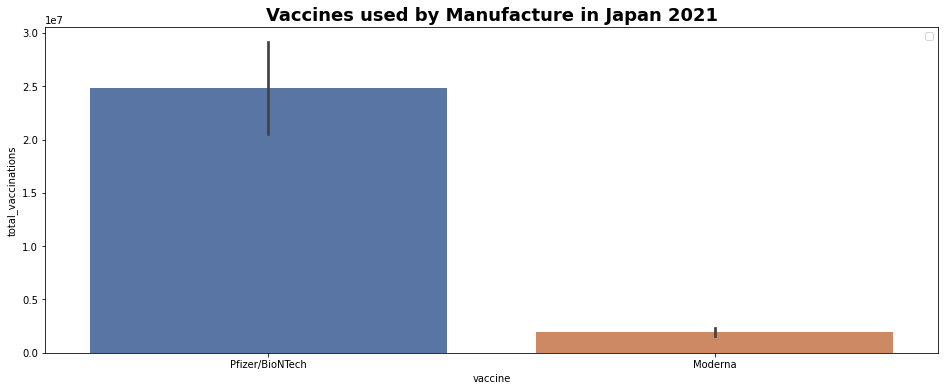

In [48]:
plt.figure(figsize=(16,6))
plt.title('Vaccines used by Manufacture in Japan 2021', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
ax = sns.barplot(y = "total_vaccinations", x = "vaccine", data = df_vaccine_Japan[df_vaccine_Japan['Year']==2021], palette = 'deep', dodge = False), 
plt.legend(loc="upper right")